# AutoML

Tabular Data

* La primera linea del CSV ha de ser la cabecera, estos son los nombres de las columnas
* Las columnas pueden contener caracteres alfanúmericos y la barra baja "_" (no puede comenzar por)
* Cada CSV no puede pasar de 10GB, si pesa mas de 10GB lo puedes repartir en varios CSV hasta un máximo de 100GB
* El delimitador ha de ser la coma ",".
* Al menos 1000 filas para Tabular Data, 100 imagenes por clase para Vision AI
    
No hace falta delimitar el schema del CSV (si las columnas son enteros, flotantes, strings..., etc), Vertex AI lo hace por ti.
Se puede repartir los datos entre entrenamiento, validación y test de forma automatica o manual

## Automático
Ejemplo para un caso sin asignar

|"John"|"Doe"|"555-55-5555"|
|"Jane"|"Doe"|"444-44-4444"|
|"Roger"|"Rogers"|"123-45-6789"|
|"Sarah"|"Smith"|"333-33-3333"|

## Manual
Ejemplo con los datos asignados
"TRAIN","John","Doe","555-55-5555"
"TEST","Jane","Doe","444-44-4444"
"TRAIN","Roger","Rogers","123-45-6789"
"VALIDATE","Sarah","Smith","333-33-3333"

## Manual/Automático
"UNASSIGNED","John","Doe","555-55-5555"
"TEST","Jane","Doe","444-44-4444"
"UNASSIGNED","Roger","Rogers","123-45-6789"
"UNASSIGNED","Sarah","Smith","333-33-3333"


## Chronologically

En este caso se asignan los casos en el orden de aparición en el CSV. Por ejemplo un reparto 80 10 10 daría como resultado
* El primer 80% de las líneas del CSV se asignaria a entrenamiento, TRAIN.
* El siguiente 10% se asignaria a validacion, VALIDATION.
* El último 10% se asignaria a test, TEST.

In [51]:
from sklearn.datasets import fetch_covtype
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

In [43]:
df = fetch_covtype(return_X_y=False, as_frame=True)['frame']
df = df[df.Cover_Type.isin([5,3])].sample(2000).reset_index(drop=True)
#df.to_csv("cover.csv", index=False)
#df = df[["Wilderness_Area_3", "Wilderness_Area_0","Elevation", "Cover_Type"]]

In [77]:
rfc = RandomForestClassifier(warm_start=True, n_estimators=30)
train = df.head(1500)
test = df.tail(500)
X_train, y_train = train.iloc[:, :-1].values, train.iloc[:, -1:].values.reshape(-1)
X_test, y_test = test.iloc[:, :-1].values, test.iloc[:, -1:].values.reshape(-1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[386,  15],
       [ 16,  83]], dtype=int64)

In [37]:
import matplotlib.pyplot as plt
import numpy as np

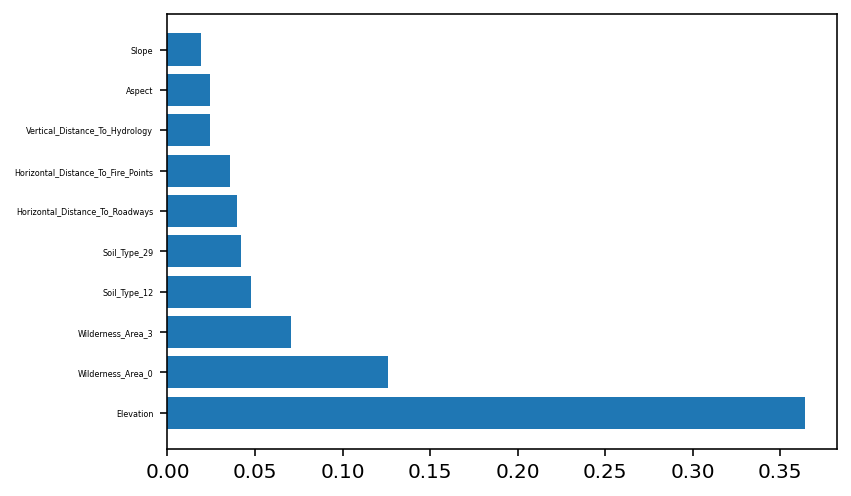

In [38]:
fig, ax = plt.subplots(dpi=144)
order = np.argsort(rfc.feature_importances_)[::-1]
names = df.columns[:-1][order]
values = rfc.feature_importances_[order]
_ = plt.barh(y=names[:10], width=values[:10])
_ = plt.yticks(fontsize=4)
ax.xaxis.label.set_size(10)

In [14]:
import seaborn as sns

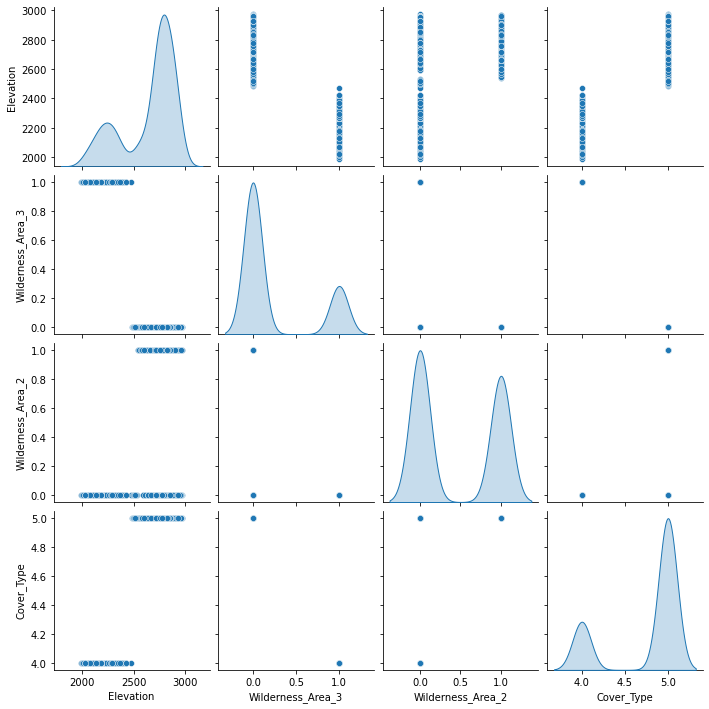

In [19]:
sns.pairplot(df.head(1000)[["Elevation", "Wilderness_Area_3", "Wilderness_Area_2", "Cover_Type"]], diag_kind='kde')